# E-tivity 1 (22/03/21 - 11/04/21)

* David Mulhall

* 12128856

## Anomaly Detection

### Context
We have a mystery dataset. There are 9 explanatory variables and one response variable. The response variable is the last column and indicates if the sample is anomalous (=1, valid =0). The dataset is provided "data.csv". 

Of course in this case we could use supervised learning to generate a model and detect anomalies in new data. However the focus is on autoencoders, anomaly detection is just one of the potential uses for autoencoders.

So we are going to pretend that we do not know which data are anomalous but we do know that the anomaly rate is small. Use an autoencoder to detect anomalies in the data. The correctness of the model can of course be checked.

### Guidelines

The e-tivity is split into four tasks. The first three are "group" excersises, in that you post the solutions to Tasks 1-3 to a site. This will allow the members of your group to send you feedback (via the forums) so you can improve your submission.

The final task is an individual task and together with the other tasks, should be uploaded to Sulis.

Grading guidelines: Weight [5/7]

**Beginning [0-8]**: Task 1 complete with sensible feature selection and data in suitable form for use in NN. Task 4 is posted to GitLab in contravention of instructions. Tasks 1-4 are not in a single notebook without correct identification or filename. 

**Developing [9-12]**: Beginning + suitable autoencoder model that has been correctly trained.

**Advancing [13-16]**: Developing + correct histogram and threshold.

**Accomplished [17-20]**: Advancing + implement a suitable VAE and correct testing.

## Problem

If you train even a modest feed forward network via supervised learning you can get extremely good recall and precision, despite the unbalanced dataset. However in this e-tivity you will determining the anomalies by using an autoencoder. That is you will **not** be using the Anom flag to guide the training.

The mystery dataset is available from the Sulis site, download the csv file and use it as the input data.

### Tasks 1-3 (complete by Monday 05/04/21)

These tasks are to be completed and uploaded to GitLab on which the other group members can comment. The forum activity will form part of the overall mark for the e-tivity.

**Task 1: data preprocessing**

Explain any preprocessing steps you take and also how you have selected the training and test sets. Remember we do not know which samples are anomalous only that there are a small number of them compared to the total sample size.


**Task 2: model generation and training**

Generate a suitable autoencoder model, the only restriction is that there should be only 2 latent variables. Train the model to a satistifactory result. Be aware that it will be much harder to achieve the sort of result you can get from a supervised learning model. 

**Hint**: it should not take long to run a 1000 epochs. However it may be difficult to train. Use different optimizers, topologies and/or weight initialisations to get convergence. Remember that achieving a perfect error means that the model will also be good at reconstructing anomalies. 


**Task 3: anomaly detection**

From the histogram of the reconstruction error decide what the cutoff should be applied to distinguish anomalies from valid samples, given that the anomaly rate is ~7%.

### Post (complete by Monday 05/04/21)

Post your solution to Tasks 1-3 in notebook form. If you have not completed all the tasks then that is acceptable. The purpose is to get feedback from others in the group, so if you have only a basic outline then you may get ideas about how to proceed and also examples from others in your group.

### Respond (complete by Wednesday 07/04/21)

If you feel you can provide useful advise then respond to another member of the group through the appropriate forum. Responses should be respectful and offer some sort of advise. Try and avoid clogging the forums with support or thank you messages.

Grading guidelines for the forum posts: Weight [2/7]

**Beginning [0-8]:** Respectful posts of minor value. Significant number of posts without valuable contributions and/or without well-considered questions. Posts about task 4 in contravention of intructions.

**Developing [9-12]:** At least 1 post  exceeding Beginning level with respectful suggestion or thought provoking question. Most posts contain valuable contributions or well-considered questions.

**Advancing [13-16]:** At least 2 posts: 1 equal to or exceeding Beginning level;  1 with respectful and sound contribution highlighting mistakes or alternative approaches.

**Accomplished [17-20]:** At least 3 posts: 2 equal to or exceeding Accomplished level; 1 with respectful contribution of significant value. 

### Reflect (complete by Sunday 11/04/21)

Reflect on the responses you got from your peers for Tasks 1-3 and modify your own code if you feel that it is necessary. It is useful for yourself and others to send a post outlining what was useful after the reflection.



### Task 4: VAE (completed by Sunday 11/04/21)

This task is a individual task and should **not** to be uploaded to GitHub. No direct support should be given via the forums, although comments about progress or results are allowed. Marks will be deducted if the instructions are not followed (see rubrics). This part should be uploaded directly to Sulis.

Change the network to be a VAE. Again determine the optimal cutoff and plot the latent variables. Check how good the cutoffs were by constructing a confusion matrix or generating a classification report. Obviously for this task you need to use the Anom column.

**Hint** you can use the model topology from the AE (with the obvious modifications). I found that I had a good model (almost as good and the supervised learning model) when the KL divergence was small. You can print out both the KL divergence and reconstruction loss for each epoch. It can be tricky to train these type of models, so do not be surprised if you do not get a stellar result. What is more important is that you have the correct code to implement the VAE.

### Final Submission (complete by Sunday 11/04/21)

Submit Tasks 1-4 in a single notebook this before the deadline on Sunday.


# Solution

## Task 1: data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adagrad, Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Read Data from Data set
df = pd.read_csv('./data.csv')
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Anom
count,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000
mean,46.932399,-0.063955,85.123124,0.213231,36.871784,2.160030,38.200725,48.288592,10.261930,0.071511
std,12.875159,84.674481,8.877517,37.579171,19.963113,218.324964,13.446306,20.572064,23.751024,0.257680
min,27.000000,-4821.000000,21.000000,-3939.000000,-188.000000,-26739.000000,-48.000000,-353.000000,-356.000000,0.000000
25%,37.000000,0.000000,79.000000,0.000000,30.000000,-4.000000,33.000000,35.000000,0.000000,0.000000
50%,44.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,41.000000,2.000000,0.000000
75%,50.000000,0.000000,88.000000,0.000000,46.000000,5.000000,43.000000,55.000000,6.000000,0.000000
max,126.000000,5075.000000,149.000000,3830.000000,436.000000,15164.000000,105.000000,270.000000,266.000000,1.000000


In [3]:
df['Anom'].value_counts()

0    45586
1     3511
Name: Anom, dtype: int64

In [4]:
#Store Anom in separate Dataframe for model comparison later
df_anom = df['Anom']
#remove Anom from Data, as this is unknown in this dataset
df = df.drop(['Anom'], axis=1)

In [5]:
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df, df_anom, test_size=0.2, random_state=42)

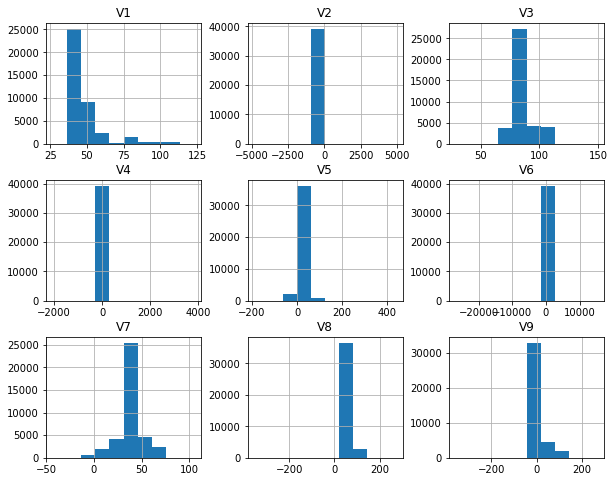

In [6]:
hist = df_X_train.hist(bins=10, figsize=[10,8])

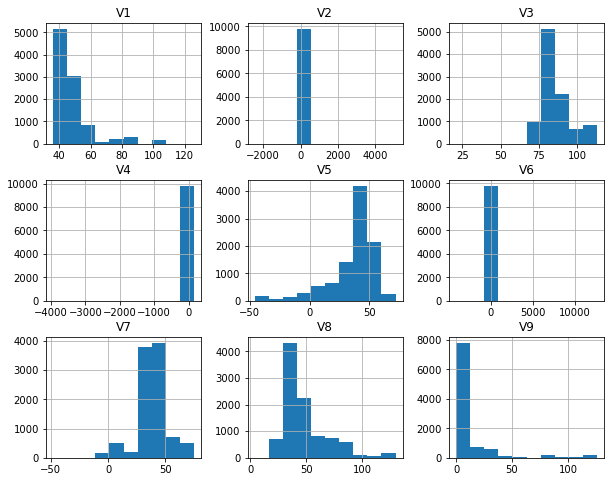

In [7]:
hist = df_X_test.hist(bins=10, figsize=[10,8])

In [8]:
scaler = MinMaxScaler()
scaler.fit(df_X_train.values)

X_scaled_train = scaler.transform(df_X_train.values)
scaled_df_X_train = pd.DataFrame(X_scaled_train, index=df_X_train.index, columns=df_X_train.columns)

X_scaled_test = scaler.transform(df_X_test.values)
scaled_df_X_test  = pd.DataFrame(X_scaled_test, index=df_X_test.index, columns=df_X_test.columns)

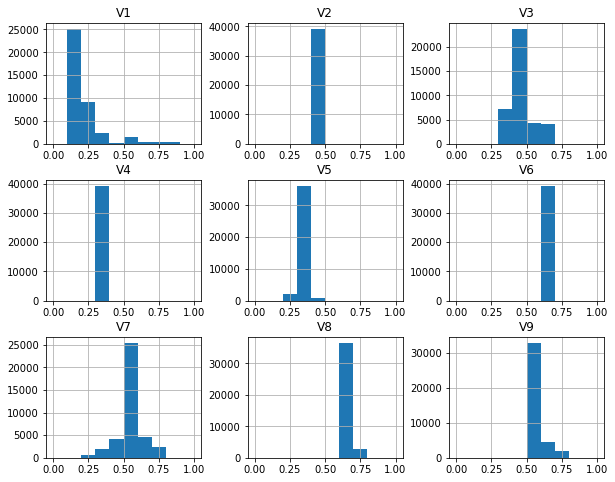

In [9]:
hist = scaled_df_X_train.hist(bins=10, figsize=[10,8])

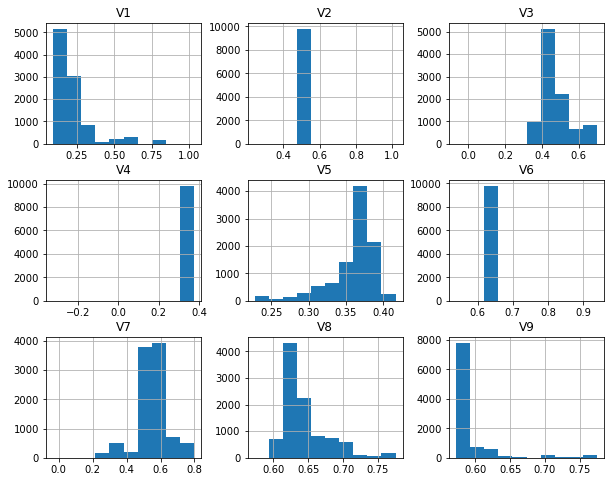

In [10]:
hist = scaled_df_X_test.hist(bins=10, figsize=[10,8])

## Task 2: model generation and training

In [11]:
X_train = scaled_df_X_train.to_numpy()
X_test = scaled_df_X_test.to_numpy()

y_train = df_y_train.to_numpy()
y_test = df_y_test.to_numpy()

print('Training Shape = {}, Test Shape = {}'.format(X_train.shape, X_test.shape))

Training Shape = (39277, 9), Test Shape = (9820, 9)


In [12]:
#Input
input_data = Input(shape=X_train.shape[1])

#Encoder Hidden Layer
encoder = Dense(units=8,activation='relu')(input_data)
encoder = Dropout(0.5)(encoder)
encoder = Dense(units=6,activation='relu')(encoder)
encoder = Dropout(0.5)(encoder)
encoder = Dense(units=4,activation='relu')(encoder)
encoder = Dropout(0.5)(encoder)

#Encoder Output Layer/Decorder Input Layer
Mid_Layer = Dense(units=2,activation='relu')(encoder)

#Decoder
decoder = Dense(units=4,activation='relu')(Mid_Layer)
decoder = Dense(units=6,activation='relu')(decoder)
decoder = Dense(units=8,activation='relu')(decoder)

#Output Layer 
output_data = Dense(units=9,activation='linear')(decoder)

autoencoder = Model(input_data,output_data)
opt = Adagrad(learning_rate=0.01)
# opt = Adam(learning_rate=0.001)
autoencoder.compile(optimizer=opt,loss='mean_squared_error')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 80        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 28        
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0     

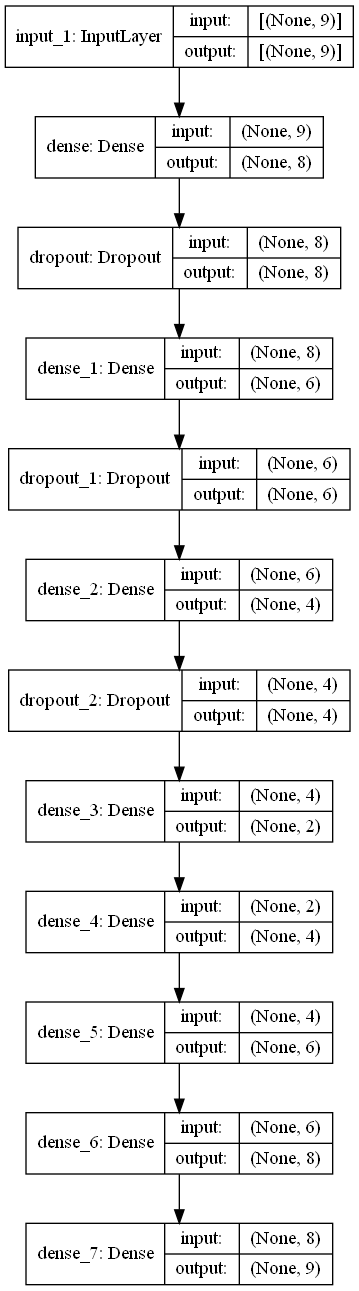

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(autoencoder,  show_shapes=True)

In [14]:
#early stopping criteria
earlyStop = EarlyStopping(monitor='loss',  min_delta=0.01, patience = 25, verbose=2)

Input_layer, Output_layer = X_train, X_train
Training = autoencoder.fit(Input_layer,Output_layer,
                           epochs=100,
                           batch_size=128,
                           validation_split=0.2,
                           callbacks=earlyStop
                          ).history

Epoch 1/100
246/246 [==============================] - 1s 3ms/step - loss: 0.1696 - val_loss: 0.0608
Epoch 2/100
246/246 [==============================] - 0s 900us/step - loss: 0.0455 - val_loss: 0.0167
Epoch 3/100
246/246 [==============================] - 0s 1ms/step - loss: 0.0130 - val_loss: 0.0066
Epoch 4/100
246/246 [==============================] - 0s 951us/step - loss: 0.0058 - val_loss: 0.0046
Epoch 5/100
246/246 [==============================] - 0s 950us/step - loss: 0.0045 - val_loss: 0.0041
Epoch 6/100
246/246 [==============================] - 0s 903us/step - loss: 0.0041 - val_loss: 0.0040
Epoch 7/100
246/246 [==============================] - 0s 904us/step - loss: 0.0040 - val_loss: 0.0040
Epoch 8/100
246/246 [==============================] - 0s 883us/step - loss: 0.0039 - val_loss: 0.0040
Epoch 9/100
246/246 [==============================] - 0s 888us/step - loss: 0.0040 - val_loss: 0.0039
Epoch 10/100
246/246 [==============================] - 0s 912us/step - loss:

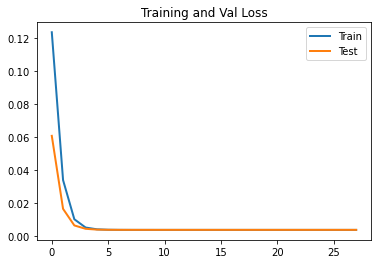

In [15]:
plt.plot(Training['loss'], linewidth=2, label='Train')
plt.plot(Training['val_loss'], linewidth=2, label='Test')
plt.title('Training and Val Loss')
plt.legend()
plt.show()

## Task 3: anomaly detection

In [16]:
Output = autoencoder.predict(X_train)
Output

array([[0.2069319 , 0.49578607, 0.46753696, ..., 0.5487577 , 0.6439786 ,
        0.5884836 ],
       [0.2069319 , 0.49578607, 0.46753696, ..., 0.5487577 , 0.6439786 ,
        0.5884836 ],
       [0.2069319 , 0.49578607, 0.46753696, ..., 0.5487577 , 0.6439786 ,
        0.5884836 ],
       ...,
       [0.2069319 , 0.49578607, 0.46753696, ..., 0.5487577 , 0.6439786 ,
        0.5884836 ],
       [0.2069319 , 0.49578607, 0.46753696, ..., 0.5487577 , 0.6439786 ,
        0.5884836 ],
       [0.20693192, 0.49578607, 0.46753696, ..., 0.5487577 , 0.6439786 ,
        0.5884836 ]], dtype=float32)

In [17]:
from tensorflow.keras.losses import mean_squared_error
Output_error = mean_squared_error(X_train,Output)
Output_error_arr = np.array(Output_error)

In [18]:
#Anomaly Threshold is at 7% of the data
# Set Threshold based on the MSE
T = np.sort(Output_error_arr)[round(len(Output_error_arr)*0.932)]
Anoms_num = Output_error_arr[Output_error_arr>T].shape[0]
Total_num = Output_error.shape[0]

print('Percentage of Anomalies = {}%'.format((Anoms_num/Total_num)*100))

Percentage of Anomalies = 6.797871527866181%


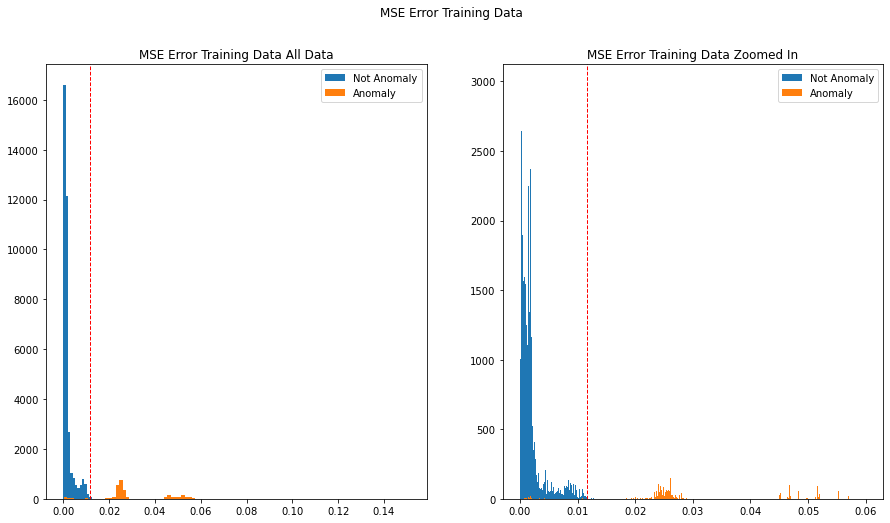

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
fig.suptitle('MSE Error Training Data')
ax1.hist(Output_error_arr[y_train == 0], bins= 100, label='Not Anomaly')
ax1.hist(Output_error_arr[y_train == 1], bins= 100, label='Anomaly')
ax1.set_title('MSE Error Training Data All Data')
ax1.axvline(T, color='r', linestyle='dashed', linewidth=1)
ax1.legend()

bins = np.linspace(0, 0.06, 500)
ax2.hist(Output_error_arr[y_train == 0], bins= bins, label='Not Anomaly')
ax2.hist(Output_error_arr[y_train == 1], bins= bins, label='Anomaly')
ax2.set_title('MSE Error Training Data Zoomed In')
ax2.axvline(T, color='r', linestyle='dashed', linewidth=1)
ax2.legend()

plt.show()

In [20]:
Categories = np.where(Output_error_arr<T, 0,1)
unique, counts = np.unique(Categories, return_counts=True)
dict(zip(unique, counts))

{0: 36606, 1: 2671}

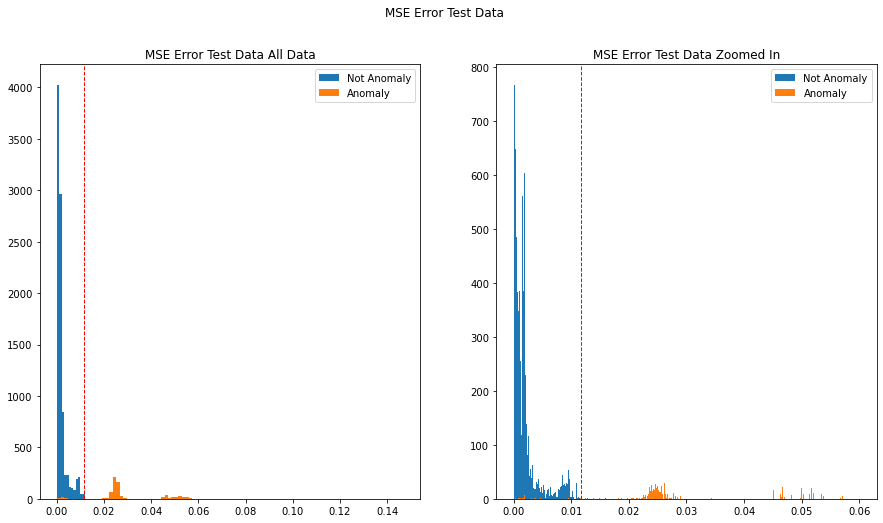

In [21]:
Output = autoencoder.predict(X_test)
Output_error = mean_squared_error(X_test,Output)
Output_error_arr = np.array(Output_error)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
fig.suptitle('MSE Error Test Data')
ax1.hist(Output_error_arr[y_test == 0], bins= 100, label='Not Anomaly')
ax1.hist(Output_error_arr[y_test == 1], bins= 100, label='Anomaly')
ax1.set_title('MSE Error Test Data All Data')
ax1.axvline(T, color='r', linestyle='dashed', linewidth=1)
ax1.legend()

bins = np.linspace(0, 0.06, 500)
ax2.hist(Output_error_arr[y_test == 0], bins= bins, label='Not Anomaly')
ax2.hist(Output_error_arr[y_test == 1], bins= bins, label='Anomaly')
ax2.set_title('MSE Error Test Data Zoomed In')
ax2.axvline(T, color='r', linestyle='dashed', linewidth=1)
ax2.legend()

plt.show()

In [22]:
def predict_anom(model, thres, X):
    Output = model.predict(X)
    Output_error = mean_squared_error(X,Output)
    Output_error_arr = np.array(Output_error)
    
    return np.where(Output_error_arr < thres, 0,1)

In [23]:
y_pred = predict_anom(autoencoder, T, X_train)
y_pred_test = predict_anom(autoencoder, T, X_test)

Train                                Test              \
                      0            1  accuracy            0           1   
precision      0.995957     0.989517  0.995519     0.996711    0.988539   
recall         0.999233     0.946972  0.995519     0.999121    0.958333   
f1-score       0.997592     0.967777  0.995519     0.997915    0.973202   
support    36486.000000  2791.000000  0.995519  9100.000000  720.000000   

                    
          accuracy  
precision  0.99613  
recall     0.99613  
f1-score   0.99613  
support    0.99613

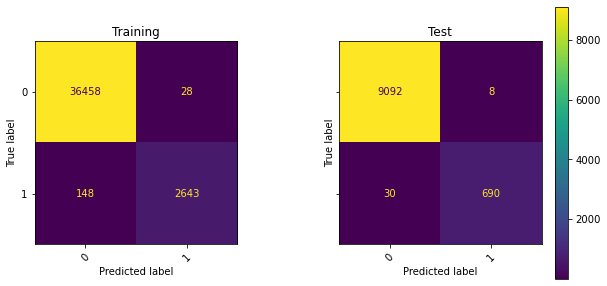

In [24]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

df_report_train = pd.DataFrame.from_dict(classification_report(y_train, y_pred, output_dict=True)).drop(['macro avg','weighted avg'], axis= 1)
df_report_val = pd.DataFrame.from_dict(classification_report(y_test, y_pred_test, output_dict=True)).drop(['macro avg','weighted avg'], axis= 1)
d = {"Train":df_report_train, "Test":df_report_val}
display(pd.concat(d.values(), axis=1, keys=d.keys()))

f, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')

cm = confusion_matrix(y_train, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[0], xticks_rotation=45)
disp.ax_.set_title('Training')
disp.im_.colorbar.remove()

cm = confusion_matrix(y_test, y_pred_test) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[1], xticks_rotation=45)
disp.ax_.set_title('Test')
plt.show()

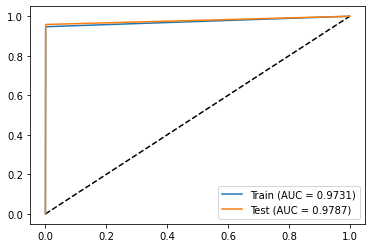

In [25]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _= roc_curve(y_train, y_pred)
auc_score = auc(fpr, tpr)
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Train (AUC = %0.4f)' % auc_score)     

fpr, tpr, _= roc_curve(y_test, y_pred_test)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Test (AUC = %0.4f)' % auc_score)  
plt.legend()

## Task 4: VAE 


In [26]:
from tensorflow.keras.layers import Lambda
from tensorflow.keras import backend as K

def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of Q(z|X)
    # Returns
        z (tensor): sampled latent vector
    """
    
    z_mean, z_log_var = args

    
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 9)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 8)            80          encoder_input[0][0]              
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 8)            0           dense_8[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 6)            54          dropout_3[0][0]                  
____________________________________________________________________________________________

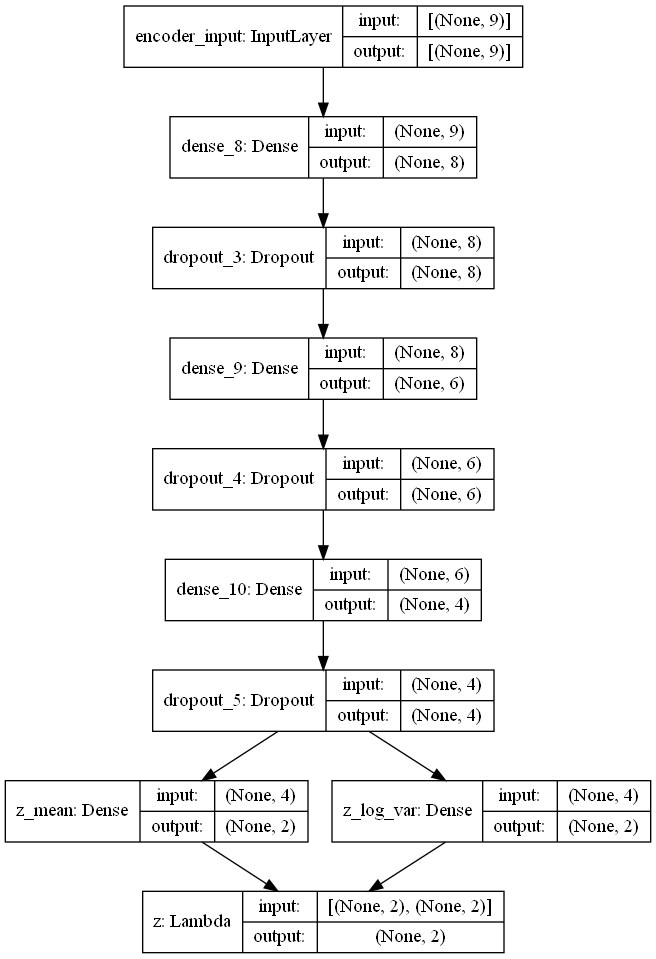

In [27]:
latent_dim = 2

#Encoder
input_data = Input(shape=X_train.shape[1], name='encoder_input')
encoder = Dense(units=8,activation='relu')(input_data)
encoder = Dropout(0.5)(encoder)
encoder = Dense(units=6,activation='relu')(encoder)
encoder = Dropout(0.5)(encoder)
encoder = Dense(units=4,activation='relu')(encoder)
encoder = Dropout(0.5)(encoder)

z_mean = Dense(latent_dim,name='z_mean', activation='linear')(encoder)
z_log_var = Dense(latent_dim, name='z_log_var',activation='linear')(encoder)

z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(input_data, [z_mean, z_log_var, z], name='encoder')
encoder.summary()
plot_model(encoder, show_shapes=True)

In [28]:
latent_dim

2

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 56        
_________________________________________________________________
dense_14 (Dense)             (None, 9)                 81        
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


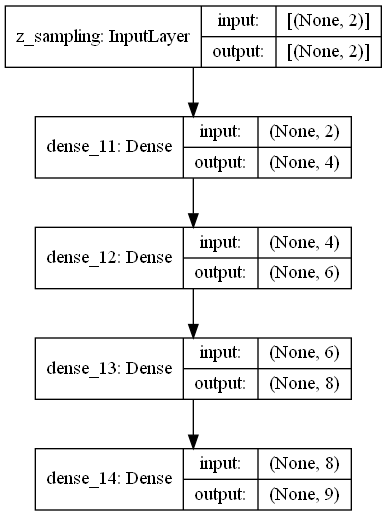

In [29]:
# build decoder model
latent_inputs = Input(shape=latent_dim, name='z_sampling')
#Decoder
decoder = Dense(units=4,activation='relu')(latent_inputs)
decoder = Dense(units=6,activation='relu')(decoder)
decoder = Dense(units=8,activation='relu')(decoder)
#Output Layer 
output_data = Dense(units=9,activation='linear')(decoder)
# instantiate decoder model
decoder = Model(latent_inputs, output_data, name='decoder')
decoder.summary()
plot_model(decoder, show_shapes=True)

Model: "vae_mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 9)]               0         
_________________________________________________________________
encoder (Functional)         [(None, 2), (None, 2), (N 182       
_________________________________________________________________
decoder (Functional)         (None, 9)                 179       
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


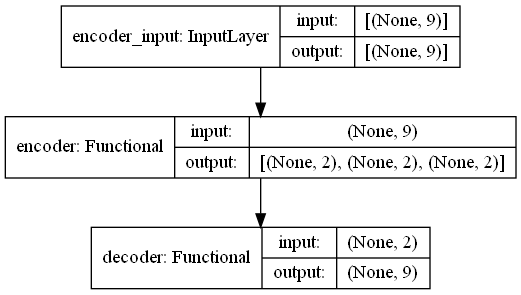

In [30]:
# instantiate VAE model
outputs = decoder(encoder(input_data)[2])
vae = Model(input_data, outputs, name='vae_mlp')
vae.summary()
plot_model(vae,show_shapes=True)

In [31]:
reconstruction_loss = tf.reduce_mean(1000.0*tf.square(input_data-outputs))
z = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_sum(-0.5*z, axis=-1)
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.add_metric(tf.reduce_sum(1000.0*tf.square(input_data-outputs)),name='rec_loss',aggregation='mean')
vae.add_metric(tf.reduce_sum(-0.5*z, axis=-1),name='kl_loss',aggregation='mean')
opt = Adagrad(learning_rate=0.1)
vae.compile(optimizer='adam')

# # Train the model
# training = vae.fit(X_train,epochs=20,batch_size=128).history

In [32]:
#early stopping criteria
earlyStop = EarlyStopping(monitor='loss',  min_delta=0.01, patience = 25, verbose=2)

# Train the model
training = vae.fit(X_train,
                   epochs=100,
                   batch_size=128,
                   validation_split=0.2,
                   callbacks=earlyStop
                  ).history

Epoch 1/100
246/246 [==============================] - 1s 2ms/step - loss: 138.4464 - rec_loss: 81094.4297 - kl_loss: 0.3720 - val_loss: 6.5034 - val_rec_loss: 7304.8784 - val_kl_loss: 0.1073
Epoch 2/100
246/246 [==============================] - 0s 1ms/step - loss: 5.6629 - rec_loss: 5801.4077 - kl_loss: 0.1999 - val_loss: 4.6993 - val_rec_loss: 5269.1470 - val_kl_loss: 0.0857
Epoch 3/100
246/246 [==============================] - 0s 1ms/step - loss: 4.5550 - rec_loss: 5026.2876 - kl_loss: 0.1227 - val_loss: 4.3469 - val_rec_loss: 4880.1499 - val_kl_loss: 0.0716
Epoch 4/100
246/246 [==============================] - 0s 1ms/step - loss: 4.2966 - rec_loss: 4787.1650 - kl_loss: 0.0844 - val_loss: 4.1890 - val_rec_loss: 4716.9277 - val_kl_loss: 0.0582
Epoch 5/100
246/246 [==============================] - 0s 1ms/step - loss: 4.1768 - rec_loss: 4669.2280 - kl_loss: 0.0585 - val_loss: 4.1026 - val_rec_loss: 4636.8608 - val_kl_loss: 0.0427
Epoch 6/100
246/246 [==============================]

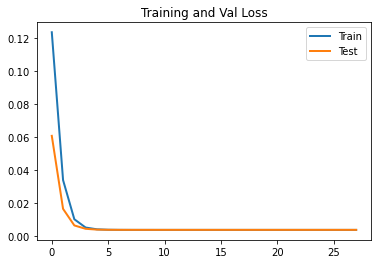

In [33]:
plt.plot(Training['loss'], linewidth=2, label='Train')
plt.plot(Training['val_loss'], linewidth=2, label='Test')
plt.title('Training and Val Loss')
plt.legend()
plt.show()

In [34]:
Output = vae.predict(X_train)
Output_error = mean_squared_error(X_train,Output)
Output_error_arr = np.array(Output_error)

In [35]:
#Anomaly Threshold is at 7% of the data

T_vae = np.sort(Output_error_arr)[round(len(Output_error_arr)*0.931)]
Anoms_num = Output_error_arr[Output_error_arr>T_vae].shape[0]
Total_num = Output_error.shape[0]

print('Percentage of Anomalies = {}%'.format((Anoms_num/Total_num)*100))

Percentage of Anomalies = 6.8971662805204055%


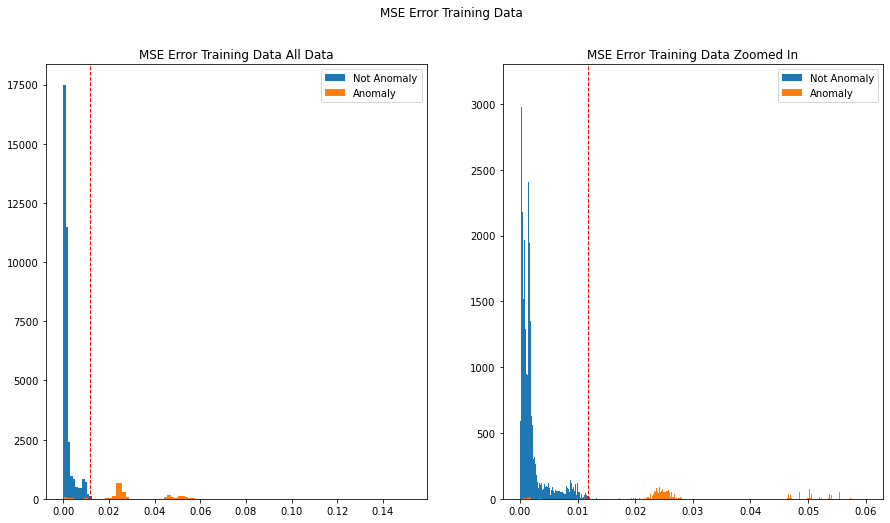

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
fig.suptitle('MSE Error Training Data')
ax1.hist(Output_error_arr[y_train == 0], bins= 100, label='Not Anomaly')
ax1.hist(Output_error_arr[y_train == 1], bins= 100, label='Anomaly')
ax1.set_title('MSE Error Training Data All Data')
ax1.axvline(T_vae, color='r', linestyle='dashed', linewidth=1)
ax1.legend()

bins = np.linspace(0, 0.06, 500)
ax2.hist(Output_error_arr[y_train == 0], bins= bins, label='Not Anomaly')
ax2.hist(Output_error_arr[y_train == 1], bins= bins, label='Anomaly')
ax2.set_title('MSE Error Training Data Zoomed In')
ax2.axvline(T_vae, color='r', linestyle='dashed', linewidth=1)
ax2.legend()

plt.show()

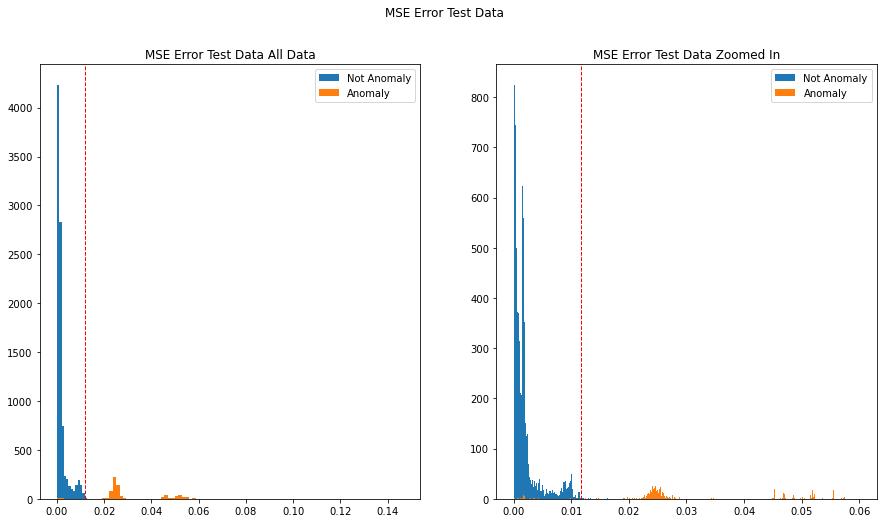

In [37]:
Output = vae.predict(X_test)
Output_error = mean_squared_error(X_test,Output)
Output_error_arr = np.array(Output_error)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
fig.suptitle('MSE Error Test Data')
ax1.hist(Output_error_arr[y_test == 0], bins= 100, label='Not Anomaly')
ax1.hist(Output_error_arr[y_test == 1], bins= 100, label='Anomaly')
ax1.set_title('MSE Error Test Data All Data')
ax1.axvline(T_vae, color='r', linestyle='dashed', linewidth=1)
ax1.legend()

bins = np.linspace(0, 0.06, 500)
ax2.hist(Output_error_arr[y_test == 0], bins= bins, label='Not Anomaly')
ax2.hist(Output_error_arr[y_test == 1], bins= bins, label='Anomaly')
ax2.set_title('MSE Error Test Data Zoomed In')
ax2.axvline(T_vae, color='r', linestyle='dashed', linewidth=1)
ax2.legend()

plt.show()

Train                                Test              \
                      0            1  accuracy            0           1   
precision      0.995980     0.976006  0.994602     0.996819    0.981534   
recall         0.998218     0.947331  0.994602     0.998571    0.959722   
f1-score       0.997098     0.961455  0.994602     0.997694    0.970506   
support    36486.000000  2791.000000  0.994602  9100.000000  720.000000   

                     
           accuracy  
precision  0.995723  
recall     0.995723  
f1-score   0.995723  
support    0.995723

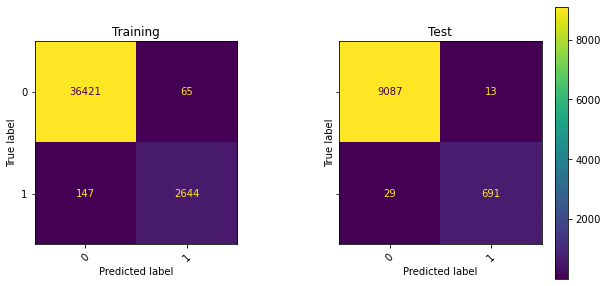

In [38]:
y_pred = predict_anom(vae, T_vae, X_train)
y_pred_test = predict_anom(vae, T_vae, X_test)


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

df_report_train = pd.DataFrame.from_dict(classification_report(y_train, y_pred, output_dict=True)).drop(['macro avg','weighted avg'], axis= 1)
df_report_val = pd.DataFrame.from_dict(classification_report(y_test, y_pred_test, output_dict=True)).drop(['macro avg','weighted avg'], axis= 1)
d = {"Train":df_report_train, "Test":df_report_val}
display(pd.concat(d.values(), axis=1, keys=d.keys()))

f, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')

cm = confusion_matrix(y_train, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[0], xticks_rotation=45)
disp.ax_.set_title('Training')
disp.im_.colorbar.remove()

cm = confusion_matrix(y_test, y_pred_test) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[1], xticks_rotation=45)
disp.ax_.set_title('Test')
plt.show()

###  Plot the latent variables

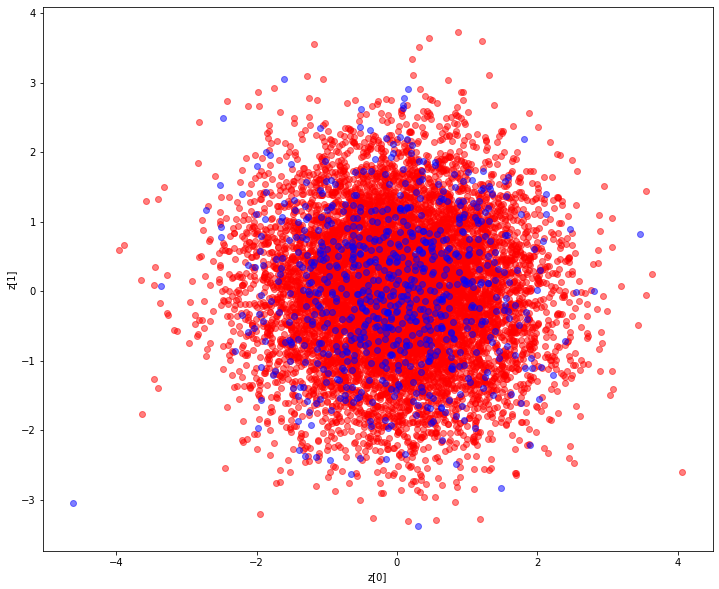

In [39]:
z_mean= encoder.predict(X_test)[2]


plt.figure(figsize=(12, 10))
plt.scatter(z_mean[y_test == 0][:, 0], z_mean[y_test == 0][:, 1], color='red', alpha = 0.5, label='Not Anomaly')
plt.scatter(z_mean[y_test == 1][:, 0], z_mean[y_test == 1][:, 1], color='blue', alpha = 0.5, label='Anomaly')
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.show()

### VAE and Autoencorder Comparison 

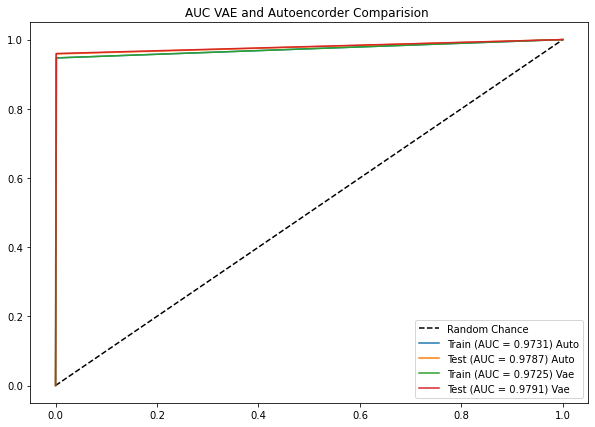

In [40]:
from sklearn.metrics import roc_curve, auc

y_pred = predict_anom(autoencoder, T, X_train)
y_pred_test = predict_anom(autoencoder, T, X_test)

fpr, tpr, _= roc_curve(y_train, y_pred)
auc_score = auc(fpr, tpr)
plt.figure(figsize = (10,7))
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.plot(fpr, tpr, label='Train (AUC = %0.4f) Auto' % auc_score)     

fpr, tpr, _= roc_curve(y_test, y_pred_test)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Test (AUC = %0.4f) Auto' % auc_score)  

y_pred = predict_anom(vae, T_vae, X_train)
y_pred_test = predict_anom(vae, T_vae, X_test)

fpr, tpr, _= roc_curve(y_train, y_pred)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Train (AUC = %0.4f) Vae' % auc_score)     

fpr, tpr, _= roc_curve(y_test, y_pred_test)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Test (AUC = %0.4f) Vae' % auc_score)  

plt.title('AUC VAE and Autoencorder Comparision ')
plt.legend()
plt.show()

# Conclusions

- Autoencoders are a vary useful tool to find anomalies in an unbalanced dataseta. These type of ANNs could be very useful in my dissertation. Where I am trying to predict failures from IC production Data
- For this problem the ANN parameters I found that dropout layers the models abililty to separate anomalies from non amomlies
    - dropout layers during training with a high dropout rate
    - using Adagrad as the optimiser, instead of Adam
    - Using a combination of relu and linear activation 
- The VAE and the orignal Autoencorder perform very similarly

In [41]:
## Add additional code cells to implememt the tasks stated above 